# Initial Value Problems Exercises

::::{admonition} Exercise 1.1
:class: note
:name: ex1.1

Using pen and a calculator solve the following IVP using the Euler method with a step length of $h=0.4$. Write down your solutions correct to 4 decimal places.
\begin{align*}
    y' =t + y, \qquad t\in [0,2],\qquad y(0)=2.
\end{align*}

:::{dropdown} Solution (click to show)

\begin{align*}
    \mathbf{t} &= (0, 0.4, 0.8, 1.2, 1.6, 2), \\
    \\
    y_0 &= 2, \\
    y_1 &= y_0 + h(t_0 + y_0) = 2 + 0.4(0 + 2) = 2.8, \\
    y_2 &= y_1 + h(t_1 + y_1) = 2.8 + 0.4(0.4 + 2.8) = 4.08, \\
    y_3 &= y_2 + h(t_2 + y_2) = 4.08 + 0.4(0.8 + 4.08) = 6.032, \\
    y_4 &= y_3 + h(t_3 + y_3) = 6.032 + 0.4(1.2 + 6.032) = 8.9248, \\
    y_5 &= y_4 + h(t_4 + y_4) = 8.9248 + 0.4(1.6 + 8.9248) = 13.1347.
\end{align*}
:::
::::

::::{admonition} Exercise 1.2
:class: note
:name: ex1.2

Repeat [exercise 1.1](ex1.1) using the RK2 method.

:::{dropdown} Solution

\begin{align*}
    k_1 &= f(t_0, y_0) = (0.0) + (2.000000) = 2.000000, \\
    k_2 &= f(t_0 + h, y_0 + hk_1) = (0.0 + 0.4) + (2.000000 + 0.4(2.000000)) \\
    &= 3.200000, \\
    y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = 2.000000 + 0.2(2.000000 + 3.200000) \\
    &= 3.040000, \\ \\
    k_1 &= f(t_1, y_1) = (0.4) + (3.040000) = 3.040000, \\
    k_2 &= f(t_1 + h, y_1 + hk_1) = (0.4 + 0.4) + (3.040000 + 0.4(3.440000)) \\
    &= 5.216000, \\
    y_2 &= y_1 + \frac{h}{2}(k_1 + k_2) = 3.040000 + 0.2(3.440000 + 5.216000) \\
    &= 4.771200, \\ \\
    k_1 &= f(t_2, y_2) = (0.8) + (4.771200) = 4.771200, \\
    k_2 &= f(t_2 + h, y_2 + hk_1) = (0.8 + 0.4) + (4.771200 + 0.4(5.571200)) \\
    &= 8.199680, \\
    y_3 &= y_2 + \frac{h}{2}(k_1 + k_2) = 4.771200 + 0.2(5.571200 + 8.199680) \\
    &= 7.525376, \\ \\
    k_1 &= f(t_3, y_3) = (1.2) + (7.525376) = 7.525376, \\
    k_2 &= f(t_3 + h, y_3 + hk_1) = (1.2 + 0.4) + (7.525376 + 0.4(8.725376)) \\
    &= 12.615526, \\
    y_4 &= y_3 + \frac{h}{2}(k_1 + k_2) = 7.525376 + 0.2(8.725376 + 12.615526) \\
    &= 11.793556, \\ \\
    k_1 &= f(t_4, y_4) = (1.6) + (11.793556) = 11.793556, \\
    k_2 &= f(t_4 + h, y_4 + hk_1) = (1.6 + 0.4) + (11.793556 + 0.4(13.393556)) \\
    &= 19.150979, \\
    y_5 &= y_4 + \frac{h}{2}(k_1 + k_2) = 11.793556 + 0.2(13.393556 + 19.150979) \\
    &= 18.302464.
\end{align*}
:::
::::

In [10]:
import numpy as np


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print(r"\begin{align*}")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        print(rf"    k_1 &= f(t_{n}, y_{n}) = ({t[n]:0.1f}) + ({y[n,0]:0.6f}) = {y[n,0]:0.6f}, \\")
        print(rf"    k_2 &= f(t_{n} + h, y_{n} + hk_1) = ({t[n]:0.1f} + {h}) + ({y[n,0]:0.6f} + {h}({k1[0]:0.6f})) \\")
        print(rf"    &= {k2[0]:0.6f}, \\")
        print(rf"    y_{n+1} &= y_{n} + \frac{{h}}{{2}}(k_1 + k_2) = {y[n,0]:0.6f} + {h/2}({k1[0]:0.6f} + {k2[0]:0.6f}) \\")
        print(rf"    &= {y[n+1,0]:0.6f}", end="")
        if n < nsteps - 1:
            print(rf", \\ \\")
        else:
            print(rf".")

    print(r"\end{align*}")
    
    return t, y


def f(t, y):
    return t + y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

\begin{align*}
    k_1 &= f(t_0, y_0) = (0.0) + (2.000000) = 2.000000, \\
    k_2 &= f(t_0 + h, y_0 + hk_1) = (0.0 + 0.4) + (2.000000 + 0.4(2.000000)) \\
    &= 3.200000, \\
    y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = 2.000000 + 0.2(2.000000 + 3.200000) \\
    &= 3.040000, \\ \\
    k_1 &= f(t_1, y_1) = (0.4) + (3.040000) = 3.040000, \\
    k_2 &= f(t_1 + h, y_1 + hk_1) = (0.4 + 0.4) + (3.040000 + 0.4(3.440000)) \\
    &= 5.216000, \\
    y_2 &= y_1 + \frac{h}{2}(k_1 + k_2) = 3.040000 + 0.2(3.440000 + 5.216000) \\
    &= 4.771200, \\ \\
    k_1 &= f(t_2, y_2) = (0.8) + (4.771200) = 4.771200, \\
    k_2 &= f(t_2 + h, y_2 + hk_1) = (0.8 + 0.4) + (4.771200 + 0.4(5.571200)) \\
    &= 8.199680, \\
    y_3 &= y_2 + \frac{h}{2}(k_1 + k_2) = 4.771200 + 0.2(5.571200 + 8.199680) \\
    &= 7.525376, \\ \\
    k_1 &= f(t_3, y_3) = (1.2) + (7.525376) = 7.525376, \\
    k_2 &= f(t_3 + h, y_3 + hk_1) = (1.2 + 0.4) + (7.525376 + 0.4(8.725376)) \\
    &= 12.615526, \\
    y_4 &= y_3 + \frac{h}{2}(k_1 + k

:::::{admonition} Exercise 1.3
:class: note
:name: ex1.3

Write a Python program to calculate the solutions to [exercises 1.1](ex1.1) and [1.2](ex1.2). 

::::{dropdown} Solution

Code

:::python
import numpy as np

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return t + y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

# Output table of solutions
print("|   t   |   Euler   |    RK2    |")
print("|:-----:|:---------:|:---------:|")
for i in range(len(t)):
    print(f"| {t[i]:5.2f} | {y_euler[i,0]:9.6f} | {y_rk2[i,0]:9.6f} |")
:::

Output

:::
|   t   |   Euler   |    RK2    |
|:-----:|:---------:|:---------:|
|  0.00 |  2.000000 |  2.000000 |
|  0.40 |  2.800000 |  3.040000 |
|  0.80 |  4.080000 |  4.771200 |
|  1.20 |  6.032000 |  7.525376 |
|  1.60 |  8.924800 | 11.793556 |
|  2.00 | 13.134720 | 18.302464 |
:::
::::
:::::

In [1]:
import numpy as np

def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return t + y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

# Output table of solutions
print("|   t   |   Euler   |    RK2    |")
print("|:-----:|:---------:|:---------:|")
for i in range(len(t)):
    print(f"| {t[i]:5.2f} | {y_euler[i,0]:9.6f} | {y_rk2[i,0]:9.6f} |")

|   t   |   Euler   |    RK2    |
|:-----:|:---------:|:---------:|
|  0.00 |  2.000000 |  2.000000 |
|  0.40 |  2.800000 |  3.040000 |
|  0.80 |  4.080000 |  4.771200 |
|  1.20 |  6.032000 |  7.525376 |
|  1.60 |  8.924800 | 11.793556 |
|  2.00 | 13.134720 | 18.302464 |


:::::{admonition} Exercise 1.4
:class: note
:name: ex1.4

The exact solution to the IVP in [exercise 1.1](ex1.1) is $y=3e^t - t - 1$. Produce a plot of the Euler solution, the Runge-Kutta solution and the exact solution on the same set of axes.

::::{dropdown} Solution

Code

:::python
import matplotlib.pyplot as plt

def exact(t):
    return 3 * np.exp(t) - t - 1


# Plot solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()
:::
Output

:::{glue:} ex1.4_plot
:::
::::
:::::

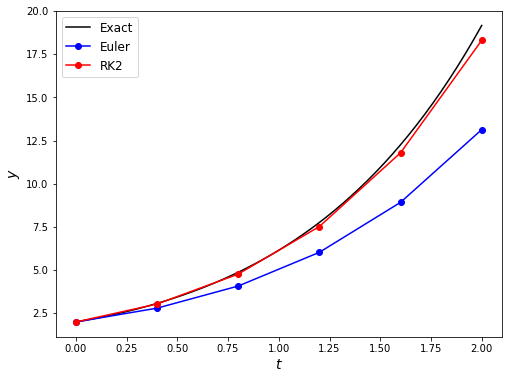

In [2]:
import matplotlib.pyplot as plt

def exact(t):
    return 3 * np.exp(t) - t - 1


# Plot solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [3]:
from myst_nb import glue
glue("ex1.4_plot", fig, display=False)

:::::{admonition} Exercise 1.5
:class: note
:name: ex1.5

The motion of a pendulum can be modelled by the following ODE

\begin{align*}
    \theta'' + \frac{g}{L} \sin(\theta) = 0,
\end{align*}

where $\theta$ is the angle between the pendulum and the vertical, $L$ is the length of the pendulum and $g=9.81$ ms$^{-2}$ is the acceleration due to gravity.

:::{figure} ../Images/pendulum.png
:align: center
:::

Write a Python program that uses the RK2 method with $h=0.1$ to calculate the solution for $\theta$ over the interval $t\in [0, 5]$ for a pendulum of length $L = 1$ set at an initial angle $\theta = \frac{\pi}{2}$. Produce a plot of the displacement angle $\theta$ against $t$.


::::{dropdown} Solution

:::python
import numpy as np
import matplotlib.pyplot as plt


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return t + y


def exact(t):
    return 3 * np.exp(t) - t - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [2]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y_euler = euler(f, tspan, y0, h)
t, y_rk2 = rk2(f, tspan, y0, h)

# Output table of solutions
yexact = exact(t)
print("|   t   |   Euler   |    RK2    |")
print("|:-----:|:---------:|:---------:|")
for i in range(len(t)):
    print(f"| {t[i]:5.2f} | {y_euler[i,0]:9.6f} | {y_rk2[i,0]:9.6f} |")


# Plot solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_euler[:,0], "bo-", label="Euler")
plt.plot(t, y_rk2[:,0], "ro-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()
:::

:::{glue:} ex1.5_plot
:::

::::
:::::

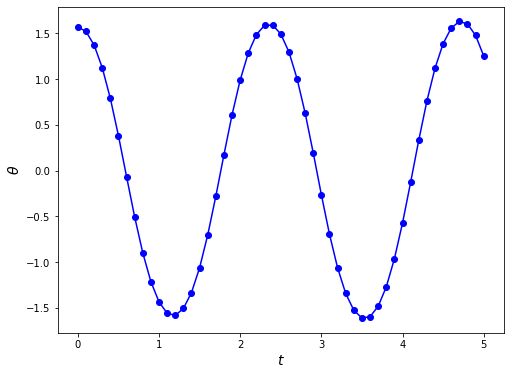

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + h, y[n,:] + h * k1)
        y[n+1,:] = y[n,:] + h / 2 * (k1 + k2)
        
    return t, y


def f(t, y):
    return np.array([y[1], -g / L * np.sin(y[0])])


def exact(t):
    return 3 * np.exp(t) - t - 1


# Define IVP
tspan = [0, 5]       # boundaries of the t domain
y0 = [np.pi / 2, 0]  # solution at the lower boundary
h = 0.1              # step length
L = 1                # length
g = 9.91             # gravity

# Calculate the solution to the IVP
t, y = rk2(f, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, y[:,0], "bo-", label="RK2")
plt.xlabel("$t$", fontsize=14)
plt.ylabel(r"$\theta$", fontsize=14)
plt.show()

from myst_nb import glue
glue("ex1.5_plot", fig, display=False)